Problem Statement: Data Wrangling on Real Estate Market


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

1) Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces,
special characters, or renaming them for clarity.

In [3]:
df = pd.read_csv(r"C:\Users\rv401\Desktop\DMV\4_RealEstate_price.csv")

In [4]:
print(df)

     Home     Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood  \
0       1  114300.0  1790       2.0          2       2    No         East   
1       2  114200.0  2030       4.0          2       3    No         East   
2       3  114800.0  1740       3.0          2       1    No         East   
3       4   94700.0  1980       3.0          2       3    No         East   
4       5  119800.0  2130       3.0          3       3    No         East   
..    ...       ...   ...       ...        ...     ...   ...          ...   
123   124  119700.0  1900       3.0          3       3   Yes         East   
124   125  147900.0  2160       4.0          3       3   Yes         East   
125   126  113500.0  2070       2.0          2       2    No        North   
126   127  149900.0  2020       3.0          3       1    No         West   
127   128  124600.0  2250       NaN          3       4    No        North   

     Sales_date  
0    15-01-2021  
1    21-09-2022  
2    13-03-2022  
3  

In [5]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")

2.Handle missing values in the dataset, deciding on an appropriate strategy

In [6]:
print(df.isnull().sum())

Home            0
Price           4
SqFt            0
Bedrooms        4
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
Sales_date      0
dtype: int64


In [8]:
price_mean = df['Price'].mean()
bedrooms_mode = df['Bedrooms'].mode()[0]

# Impute missing values with the mode
df['Price'].fillna(price_mean, inplace=True)
df['Bedrooms'].fillna(bedrooms_mode, inplace=True)
print(df.isnull().sum())

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
Sales_date      0
dtype: int64


C:\Users\rv401\AppData\Local\Temp\ipykernel_19172\4003967175.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(price_mean, inplace=True)
C:\Users\rv401\AppData\Local\Temp\ipykernel_19172\4003967175.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

4.Filter and subset the data based on specific criteria, such as a particular time period,
property type, or location.

In [9]:

filtered_df = df[df['Bedrooms'] <= 2]
print(filtered_df)

     Home          Price  SqFt  Bedrooms  Bathrooms  Offers Brick  \
0       1  114300.000000  1790       2.0          2       2    No   
11     12  123000.000000  1870       2.0          2       2   Yes   
18     19  111400.000000  1700       2.0          2       1   Yes   
28     29   69100.000000  1600       2.0          2       3    No   
31     32  112300.000000  1930       2.0          2       2   Yes   
34     35  130718.548387  2000       2.0          2       3    No   
36     37  117500.000000  1880       2.0          2       2    No   
42     43  105600.000000  1990       2.0          2       3    No   
46     47  129800.000000  1990       2.0          3       2    No   
48     49  115900.000000  1980       2.0          2       2    No   
51     52  130718.548387  1860       2.0          2       3    No   
52     53  117400.000000  2150       2.0          3       4    No   
55     56  125700.000000  1720       2.0          2       2   Yes   
61     62  100900.000000  1610    

In [10]:

subset_df = df[["Price", "SqFt", "Offers"]]
print(subset_df)

        Price  SqFt  Offers
0    114300.0  1790       2
1    114200.0  2030       3
2    114800.0  1740       1
3     94700.0  1980       3
4    119800.0  2130       3
..        ...   ...     ...
123  119700.0  1900       3
124  147900.0  2160       3
125  113500.0  2070       2
126  149900.0  2020       1
127  124600.0  2250       4

[128 rows x 3 columns]


5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or
label encoding) for further analysis

In [11]:
label_mapping = {"No": 0, "Yes": 1}
df['Brick'] = df['Brick'].map(label_mapping)

In [12]:
print(df['Brick'])

0      0
1      0
2      0
3      0
4      0
      ..
123    1
124    1
125    0
126    0
127    0
Name: Brick, Length: 128, dtype: int64


6.Aggregate the data to calculate summary statistics or derived metrics such as average
sale prices by neighborhood or property type.

In [13]:
grouped_data = df.groupby(['Neighborhood'])['Price'].mean().reset_index()

In [14]:
print(grouped_data)

  Neighborhood          Price
0         East  124891.935484
1        North  111348.570381
2         West  159294.871795


7.Identify and handle outliers or extreme values in the data that may affect the analysis
or modeling process.

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Home          128 non-null    int64  
 1   Price         128 non-null    float64
 2   SqFt          128 non-null    int64  
 3   Bedrooms      128 non-null    float64
 4   Bathrooms     128 non-null    int64  
 5   Offers        128 non-null    int64  
 6   Brick         128 non-null    int64  
 7   Neighborhood  128 non-null    object 
 8   Sales_date    128 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 9.1+ KB
None


In [16]:
df['Price'] = df['Price'].astype(int)

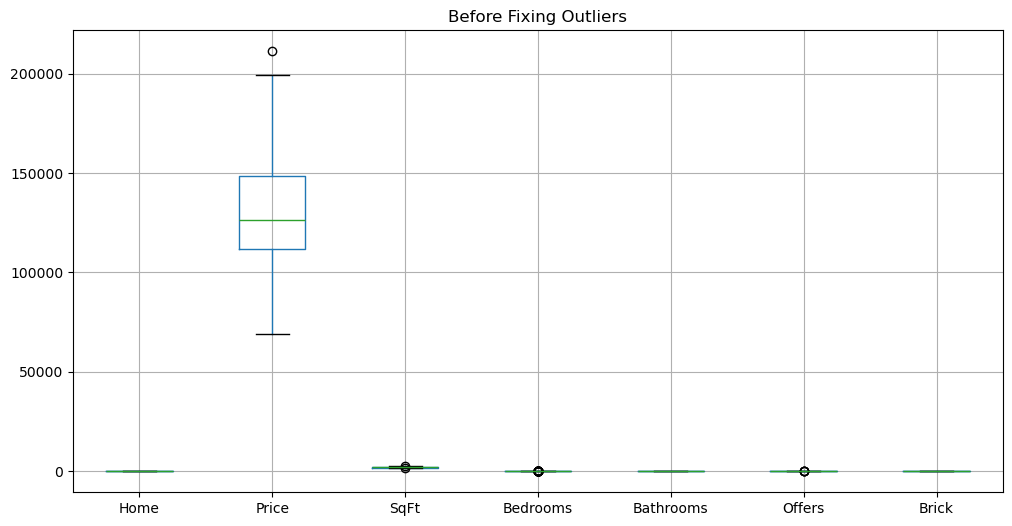

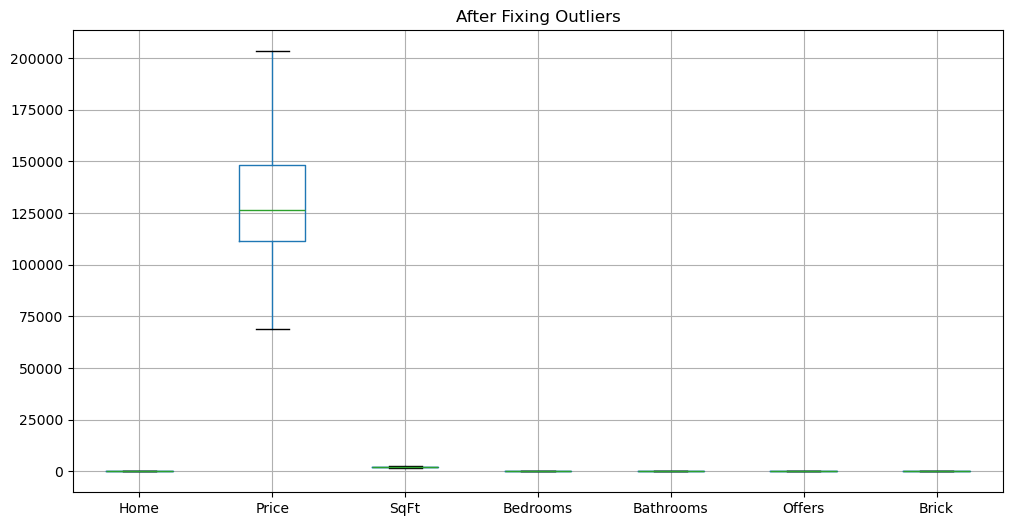

Outliers have been fixed using IQR capping.

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers  Brick Neighborhood  \
0     1  114300  1790       3.0          2     2.0      0         East   
1     2  114200  2030       3.0          2     3.0      0         East   
2     3  114800  1740       3.0          2     1.0      0         East   
3     4   94700  1980       3.0          2     3.0      0         East   
4     5  119800  2130       3.0          3     3.0      0         East   

   Sales_date  
0  15-01-2021  
1  21-09-2022  
2  13-03-2022  
3  31-08-2021  
4  31-08-2021  


In [17]:

import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Boxplot before fixing
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Before Fixing Outliers")
plt.show()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Boxplot after fixing
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("After Fixing Outliers")
plt.show()

# Show result
print("Outliers have been fixed using IQR capping.\n")
print(df.head())
